![image](https://i.postimg.cc/BQVFCLrM/netflix-notebook-image.jpg)

## Import packages

In [1]:
!pip install jovian --upgrade --quiet
!pip install opendatasets --upgrade --quiet
import opendatasets as od
import jovian
import os
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.xkcd() # comic style
matplotlib.rcParams['font.size'] = 16
import plotly.graph_objects as go


<IPython.core.display.Javascript object>

In [2]:
project_name = "project-netflix-by-attila-balogh"

## Download the dataset

In [3]:
#dataset_url = 'https://www.kaggle.com/shivamb/netflix-shows' 
#od.download(dataset_url)
#data_dir = './netflix-shows'
#os.listdir(data_dir)

In [4]:
#raw_df = pd.read_csv(data_dir + '/netflix_titles.csv')

In [5]:
raw_df = pd.read_csv('../input/netflix-shows/netflix_titles.csv')

## Data preparation

In [6]:
print("The shape of the raw dataset: ", raw_df.shape)

The shape of the raw dataset:  (6234, 12)


In [7]:
# To see all the columns
pd.set_option('display.max_columns', raw_df.shape[1])

In [8]:
# Print out a 6 row sample from the dataframe
raw_df.sample(6)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4596,80124728,Movie,Ricardo O'Farrill: Abrazo navideño,"Raúl Campos, Jan Suter","Ricardo O'Farrill, Carlos Ballarta, Sofía Niño...",Mexico,"December 12, 2016",2016,TV-MA,31 min,Stand-Up Comedy,The expressive Ricardo O'Farrill uses his astu...
5928,80211576,TV Show,First Team: Juventus,NaN,NaN,United States,"July 6, 2018",2018,TV-G,2 Seasons,"Docuseries, International TV Shows",Follow renowned soccer club Juventus on and of...
1160,80158084,Movie,The Case for Christ,Jon Gunn,"Mike Vogel, Erika Christensen, Faye Dunaway, R...",United States,"November 21, 2017",2017,TV-PG,113 min,"Dramas, Faith & Spirituality",Bothered by his wife's unyielding belief in Ch...
3901,80214581,Movie,Dismissed,Benjamin Arfmann,"Kent Osborne, Dylan Sprouse, Rae Gray, Alycia ...",United States,"February 19, 2018",2017,TV-14,87 min,Thrillers,An intelligent but intense honor student traum...
831,510854,Movie,The Flintstones,Brian Levant,"John Goodman, Elizabeth Perkins, Rick Moranis,...",United States,"October 1, 2019",1994,PG,91 min,"Children & Family Movies, Comedies",The Flintstones hit the big screen in this liv...
2047,80188579,Movie,Bayonet,Kyzza Terrazas,"Luis Gerardo Méndez, Brontis Jodorowsky, Joona...","Mexico, Finland","March 29, 2019",2019,TV-MA,102 min,"Dramas, International Movies, Sports Movies","Alone in Finland, a retired Mexican boxer live..."


In [9]:
# We have an index column in the dataset as show_id, so we can change the index column to that
df = raw_df.set_index('show_id')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6234 entries, 81145628 to 70153404
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          6234 non-null   object
 1   title         6234 non-null   object
 2   director      4265 non-null   object
 3   cast          5664 non-null   object
 4   country       5758 non-null   object
 5   date_added    6223 non-null   object
 6   release_year  6234 non-null   int64 
 7   rating        6224 non-null   object
 8   duration      6234 non-null   object
 9   listed_in     6234 non-null   object
 10  description   6234 non-null   object
dtypes: int64(1), object(10)
memory usage: 584.4+ KB


In [11]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6234 entries, 81145628 to 70153404
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          6234 non-null   object        
 1   title         6234 non-null   object        
 2   director      4265 non-null   object        
 3   cast          5664 non-null   object        
 4   country       5758 non-null   object        
 5   date_added    6223 non-null   datetime64[ns]
 6   release_year  6234 non-null   int64         
 7   rating        6224 non-null   object        
 8   duration      6234 non-null   object        
 9   listed_in     6234 non-null   object        
 10  description   6234 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 584.4+ KB


In [13]:
# What columns the dataset has
print('Column number :', len(df.columns))
print('Column names  :', end=' ')
for ind, col in enumerate(df.columns):
    if ind+1 < len(df.columns):
        print(col, end=', ')
    else:
        print(col, end='')

Column number : 11
Column names  : type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description

In [14]:
gen_cols = (['type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year',
             'rating', 'duration', 'listed_in', 'description'])

# Exploratory Analysis and Visualization

# Movies and series

### Q: What is the proportion of movies and series on Netflix?

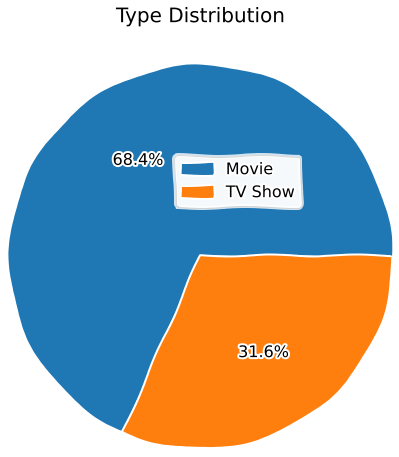

In [15]:
# Pie chart about the movie/series distribution
plt.pie(df['type'].value_counts(), radius=2.2, autopct='%1.1f%%')
plt.title('Type Distribution', fontsize=20, y=1.55)
plt.legend(df.type.value_counts().index)
plt.show()

### Q: What are the oldest contents on Netflix?

In [16]:
df[df['type']=='Movie'].sort_values(by='release_year').head(5)[gen_cols]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
60027942,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,2017-03-31,1942,TV-G,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
60027945,Movie,Prelude to War,Frank Capra,NaN,United States,2017-03-31,1942,TV-PG,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
70013050,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,2017-03-31,1943,TV-14,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
70022548,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,2017-03-31,1943,NR,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
80119186,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,2017-03-31,1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...


**The oldest movie on Netflix is The Battle of Midway and Prelude to War by John Ford and Frank Capra from 1942, while the oldest series is Pioneers: First Women Filmmakers from 1925.**

In [17]:
df[df['type']=='TV Show'].sort_values(by='release_year').head(5)[gen_cols]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
81030762,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-PG,1 Season,TV Shows,This collection restores films from women who ...
80161851,TV Show,Pioneers of African-American Cinema,"Oscar Micheaux, Spencer Williams, Richard E. N...",NaN,United States,2017-02-01,1946,TV-14,1 Season,TV Shows,This newly preserved collection features more ...
70172488,TV Show,The Twilight Zone (Original Series),NaN,Rod Serling,United States,2017-07-01,1963,TV-PG,4 Seasons,"Classic & Cult TV, TV Sci-Fi & Fantasy","Hosted by creator Rod Serling, this groundbrea..."
70155574,TV Show,The Andy Griffith Show,NaN,"Andy Griffith, Ron Howard, Don Knotts, Frances...",United States,2017-07-01,1967,TV-G,8 Seasons,"Classic & Cult TV, TV Comedies",Homespun humor and easygoing Sheriff Andy Tayl...
70136140,TV Show,Star Trek,NaN,"William Shatner, Leonard Nimoy, DeForest Kelle...",United States,2017-10-01,1968,TV-PG,3 Seasons,"Classic & Cult TV, TV Action & Adventure, TV S...","Led by unflappable Capt. Kirk, the crew of the..."


### Q: How long are the Netflix movies on average?

In [18]:
# A new column for the movie durations
df['timedelta_movie'] = movie_duration = pd.to_timedelta(df[df['type'] == 'Movie']['duration'])

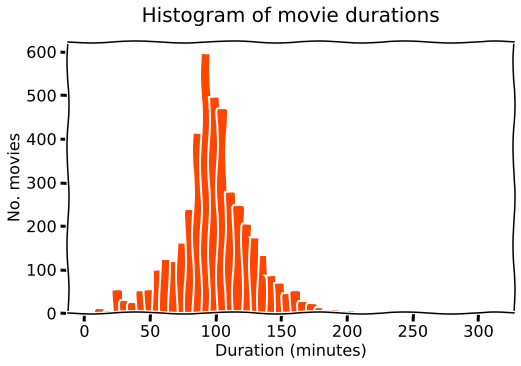

In [19]:
(df['timedelta_movie'] / pd.Timedelta(minutes=1)).hist(grid=False, bins=50, color='orangered', figsize=(8,5))
plt.xlabel('Duration (minutes)')
plt.ylabel('No. movies')
plt.title('Histogram of movie durations', fontsize=20, y=1.05)

plt.show()

In [20]:
def td_to_str(td, prop):
    """
    Takes TimeDelta value, then convert it to string.
    Works only on hours + mins (rounded).
    """
    
    if prop == "min":
        print("Shortest movie is", round(td.min().seconds/60//60), "hour(s) and", 
              round((td.min().seconds/60) - (td.min().seconds/60)//60*60), "minute(s).")
    elif prop == "max":
        print("Longest movie duration is", round(td.max().seconds/60//60), "hour(s) and", 
              round((td.max().seconds/60) - (td.max().seconds/60)//60*60), "minute(s).")
    elif prop == "mean":
        print("Mean movie duration is", round(td.mean().seconds/60//60), "hour(s) and", 
              round((td.mean().seconds/60) - (td.mean().seconds/60)//60*60), "minute(s).")
    else:
        print("error")


td_to_str(df['timedelta_movie'], "mean")
td_to_str(df['timedelta_movie'], "min")
td_to_str(df['timedelta_movie'], "max")

shortest = df[(df['timedelta_movie'] == min(df['timedelta_movie']))]
longest = df[(df['timedelta_movie'] == max(df['timedelta_movie']))]

print()
print("The sortest movie on Netflix is " + shortest['title'].item() + " from the year " 
      + str(shortest['release_year'].item()) + ".")
print()
print("The longest movie on Netflix is " + longest['title'].item() + " from the year " 
      + str(longest['release_year'].item()) + ".")

(df[(df['timedelta_movie'] == min(df['timedelta_movie'])) | 
    (df['timedelta_movie'] == max(df['timedelta_movie']))][gen_cols])

Mean movie duration is 1 hour(s) and 39 minute(s).
Shortest movie is 0 hour(s) and 3 minute(s).
Longest movie duration is 5 hour(s) and 12 minute(s).

The sortest movie on Netflix is Silent from the year 2014.

The longest movie on Netflix is Black Mirror: Bandersnatch from the year 2018.


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
70304298,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",NaN,United States,2019-06-04,2014,TV-Y7,3 min,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ..."
80988062,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


### Q: How many seasons TV shows have, and what are the longest series?

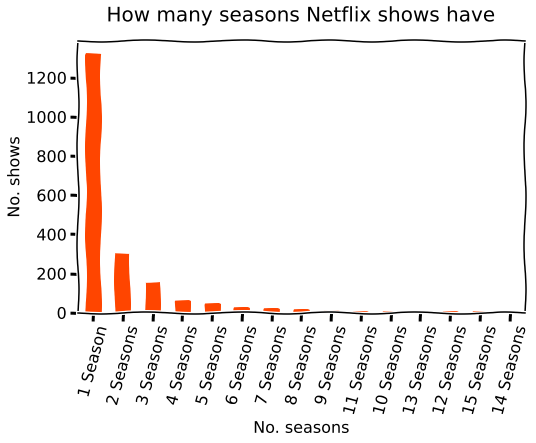

44.0

In [21]:
df[df['type'] == "TV Show"]['duration'].value_counts().plot.bar(rot=75, color='orangered', figsize=(8,5))
plt.xlabel('No. seasons')
plt.ylabel('No. shows')
plt.title('How many seasons Netflix shows have', fontsize=20, y=1.05)

plt.show()

#df[df['type'] == "TV Show"].sort_values(by='duration', ascending=False).head()

# How many shows started in 2018 or 2019
(round(df[df['type'] == "TV Show"]['release_year'].value_counts().head(2).sum() / 
       df[df['type'] == "TV Show"]['release_year'].value_counts().sum() * 100))

**The majority of the shows have only 1 season, although the 44% of all shows Netflix has were released in the year 2018 or 2019, plus Netflix has a lot of mini series, that could explain why the 1 season shows are numerically superior.**

In [22]:
df[(df['type'] == 'TV Show') & (df['duration'] == '15 Seasons')][gen_cols]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
70140391,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2019-06-15,2018,TV-14,15 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...
70142386,TV Show,NCIS,NaN,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,2018-07-01,2017,TV-14,15 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...


**The two longest (still running) series on Netflix are Grey's Anatomy and NCIS both with 15 seasons.**

### Q: Who are the programmes for?

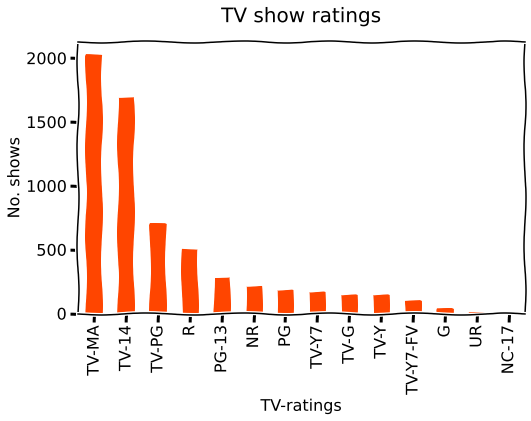

In [23]:
df['rating'].value_counts().plot.bar(color='orangered', figsize=(8,5))
plt.title('TV show ratings', fontsize=20, y=1.05)
plt.xlabel('TV-ratings')
plt.ylabel('No. shows')
plt.show()

**We can see from the bar chart above, on Netflix there are as many shows for adult audience, as there are for any generation.**

### Q: When were the shows uploaded?

In [24]:
df['year_added'] = df['date_added'].dt.year

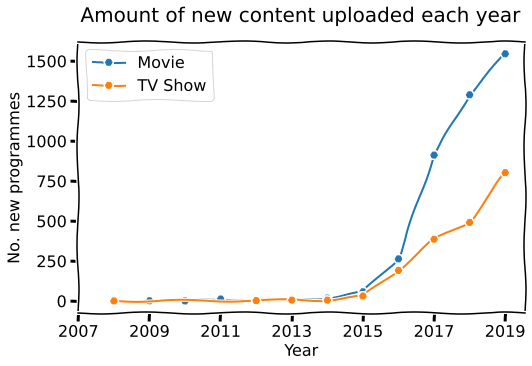

In [25]:
filt1 = (df['year_added']<2020) & (df['type'] == 'Movie')
filt2 = (df['year_added']<2020) & (df['type'] == 'TV Show')

# Movies
df[filt1]['year_added'].value_counts().sort_index().plot(marker="H", figsize=(8,5))
# Series
df[filt2]['year_added'].value_counts().sort_index().plot(marker="H")
plt.legend(['Movie', 'TV Show'])
plt.title('Amount of new content uploaded each year', fontsize=20, y=1.05)
plt.xlabel('Year')
plt.xticks([2007, 2009, 2011, 2013, 2015, 2017, 2019])
plt.ylabel('No. new programmes')
plt.show()

In [26]:
# New column - weekday of the debut of the show
df['date_added_day'] = df['date_added'].dt.weekday

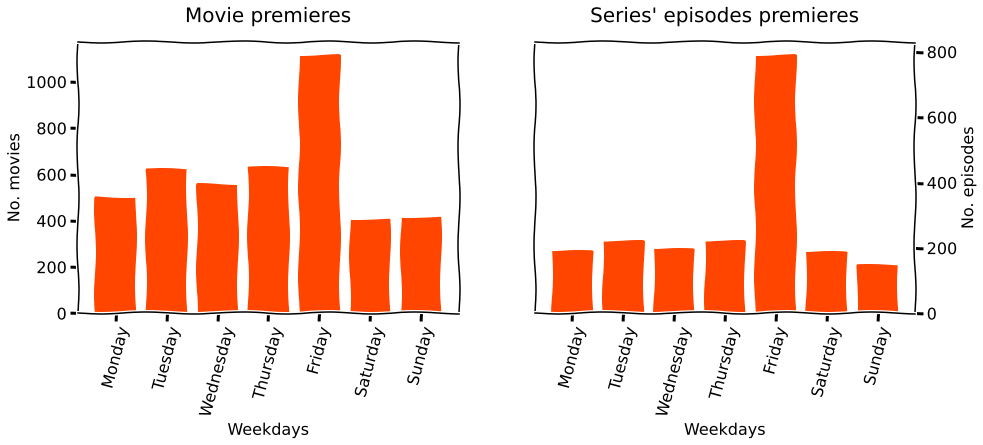

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=((15,5)))

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax1.bar(weekdays, df[df['type'] == "Movie"]['date_added_day'].value_counts().sort_index(),color='orangered')
ax1.set_xlabel('Weekdays')
ax1.set_ylabel('No. movies')
ax1.set_title('Movie premieres', fontsize=20, y=1.05)
ax1.tick_params(axis="x", rotation=75) 



ax2.bar(weekdays, df[df['type'] == "TV Show"]['date_added_day'].value_counts().sort_index(),color='orangered')
ax2.set_xlabel('Weekdays')
ax2.set_ylabel('No. episodes')
ax2.set_title("Series' episodes premieres", fontsize=20, y=1.05)
ax2.tick_params(axis="x", rotation=75) 
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()

**We can see, most of the movies and series debute on Fridays.**

# Genres

### Q: What are the most popular genres?

In [28]:
# What are the unique genres, and how many are they (movies & series)
movie_genres = pd.Series(df[df['type'] == 'Movie']['listed_in'].str.split(', ').sum()).value_counts()
series_genres = pd.Series(df[df['type'] == 'TV Show']['listed_in'].str.split(', ').sum()).value_counts()

In [29]:
# Add up the rare genres to 'others'
movie_genres_top7 = movie_genres[0:8]
movie_genres_others = pd.Series(data = movie_genres[8:].sum(), index = ['Others'])


series_genres_top7 = series_genres[0:8]
series_genres_others = pd.Series(data = series_genres[8:].sum(), index = ['Others'])

In [30]:
# Concatenate up the series
movie_genres_mixed = pd.concat([movie_genres_top7, movie_genres_others])
series_genres_mixed = pd.concat([series_genres_top7, series_genres_others])

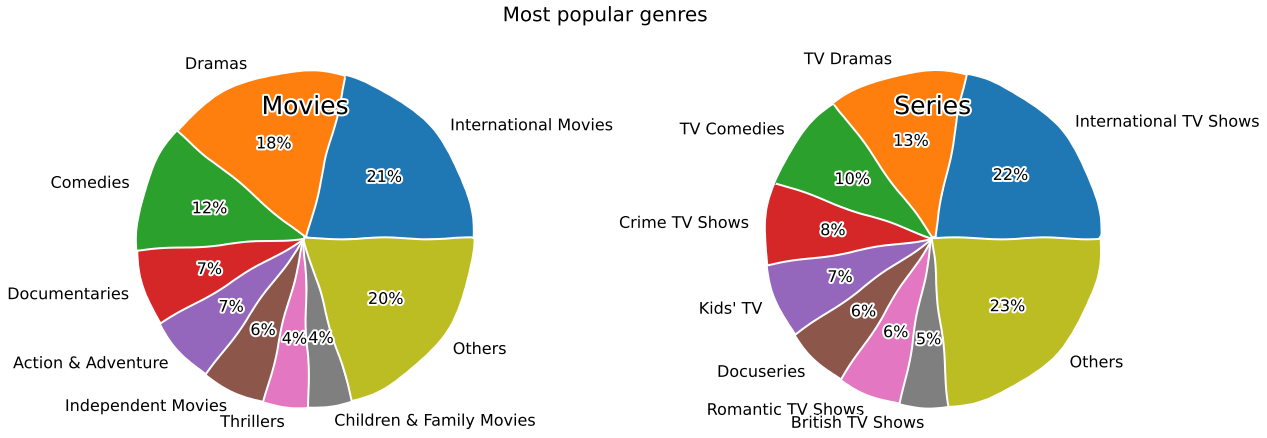

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=((15,5)))


ax1.pie(movie_genres_mixed, labels= movie_genres_mixed.index, radius=2, autopct='%1.0f%%')
ax1.set_title('Movies', fontsize=25, y=1.07)



ax2.pie(series_genres_mixed, labels= series_genres_mixed.index, radius=2, autopct='%1.0f%%')
ax2.set_title('Series', fontsize=25, y=1.07)


fig.suptitle('Most popular genres', fontsize=20, y=1.15)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=2, hspace=None)
fig.show()

# Countries

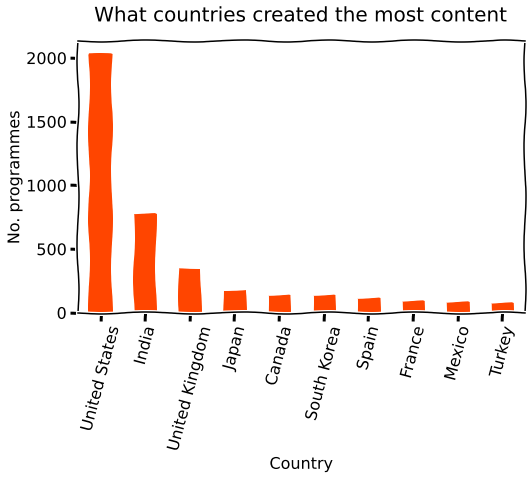

In [32]:
df['country'].value_counts().head(10).plot.bar(rot=75, color='orangered', figsize=(8,5))
plt.xlabel('Country')
plt.ylabel('No. programmes')
plt.title('What countries created the most content', fontsize=20, y=1.05)

plt.show()

### Q: How many times contries have contributed in creation of Netflix programmes?

In [33]:
# Countries list contains all the countries that participated in creation of any type of content on Netflix
# Every country occures only once, even if they didn't make anything by their own, only with others

countries = []

# Go through all rows
for i in df['country']: 
    # If it's not a NaN
    if isinstance(i, str): 
        # Split countries
        i = i.split(',') 
        # Go through all countries in one cell
        for k in i: 
            # If the list does not contain that country yet
            if k.strip().lower().title() not in countries and len(k.strip()) > 1: 
                # Add country to list
                countries.append(k.strip().lower().title()) 

countries.sort() # ABC order

print('All countries that created or co-created any content on Netflix:')
# Print out the list of countries
for ind, country in enumerate(countries):
    if ind+1 < len(countries):
        print(country, end=', ')
    else:
        print(country)
print()
# How many variations are in the dataset with these countries
print('Unique participations number: ', df['country'].nunique()) 
# How many unique countries worked on shows
print('Participated countries number: ', len(countries)) 

# Non-null elements, where countries were provided
valid_countries_num = len(df['country']) - df['country'].isnull().sum()
print('Shows where creator country/ countries were provided: ', valid_countries_num)
print('All shows number: ', len(df['country']))

All countries that created or co-created any content on Netflix:
Afghanistan, Albania, Argentina, Armenia, Australia, Austria, Azerbaijan, Bangladesh, Belgium, Bermuda, Botswana, Brazil, Bulgaria, Cambodia, Canada, Cayman Islands, Chile, China, Colombia, Croatia, Cuba, Cyprus, Czech Republic, Denmark, Dominican Republic, East Germany, Ecuador, Egypt, Finland, France, Georgia, Germany, Ghana, Greece, Guatemala, Hong Kong, Hungary, Iceland, India, Indonesia, Iran, Iraq, Ireland, Israel, Italy, Japan, Jordan, Kazakhstan, Kenya, Kuwait, Latvia, Lebanon, Liechtenstein, Luxembourg, Malawi, Malaysia, Malta, Mauritius, Mexico, Mongolia, Montenegro, Morocco, Namibia, Nepal, Netherlands, New Zealand, Nicaragua, Nigeria, Norway, Pakistan, Panama, Paraguay, Peru, Philippines, Poland, Portugal, Qatar, Romania, Russia, Samoa, Saudi Arabia, Senegal, Serbia, Singapore, Slovakia, Slovenia, Somalia, South Africa, South Korea, Soviet Union, Spain, Sri Lanka, Sudan, Sweden, Switzerland, Syria, Taiwan, Tha

In [34]:
# Making a dict from the countries, based on how many shows they worked on

# Create empty dict
counts_countries = dict() 
# Go through countries
for i in countries: 
    # Go through rows
    for k in df['country']: 
        # If the cell is not NaN
        if isinstance(k, str): 
            # If the actual country is in that cell
            if i in k: 
                # Add to the dictionary, and/or add 1 to its value
                counts_countries[i] = counts_countries.get(i, 0) + 1 

#counts_countries # Show dict

In [35]:
# Create DataFrame from the countries dict
countries_df = pd.DataFrame(counts_countries, index=[0])
countries_df = countries_df.T

countries_df.columns=['counts']

#countries_df.sort_values(by='counts', ascending=False).head(10)

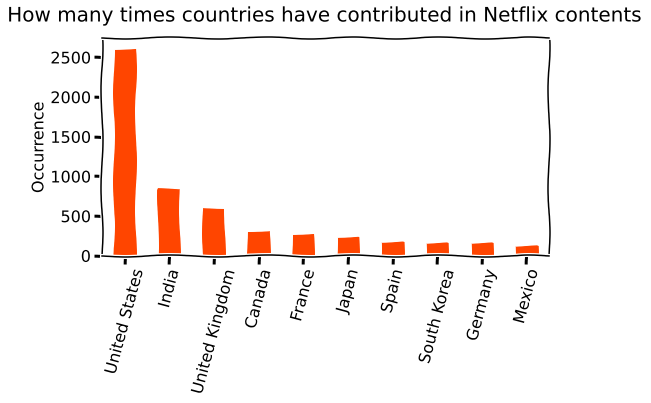

All movies and series number on Netflix: 6234
Movies and series, where country was provided:  5758
Movies and series where US was indicated as creator or co-creator:  2610


In [36]:
# Print the first 10 countries in ascending order (bar chart)
(countries_df.sort_values(by='counts', ascending=False).head(10).plot.bar
 (rot=75, legend=None, color='orangered', figsize=(8,4)))
plt.title('How many times countries have contributed in Netflix contents', fontsize=20, y=1.05)
plt.ylabel('Occurrence')

plt.show()
print("All movies and series number on Netflix:", df.shape[0])
print("Movies and series, where country was provided: ", valid_countries_num)
#print("Movies and series where US was indicated as creator or co-creator: ", 
#      countries_df.sort_values(by='counts', ascending=False).head(1)['counts'].item())
print("Movies and series where US was indicated as creator or co-creator: ", 
      countries_df.loc['United States']['counts'].item())

### Q: Has Hungary ever been envolved in creation of Netflix content?

**As a Hungarian, I was curious, how many content Netflix has from my country. There are only 2 movies from Hungary, and the country participated in the production of 3 more shows.**

In [37]:
df[df['country'].str.contains('Hungary', na=False)][gen_cols]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
80147758,Movie,Kills on Wheels,Attila Till,"Szabolcs Thuróczy, Zoltán Fenyvesi, Adám Feket...",Hungary,2018-03-15,2016,TV-MA,103 min,"Action & Adventure, Dramas, International Movies",Two young men with disabilities befriend a hit...
80177414,Movie,On Body and Soul,Ildiko Enyedi,"Alexandra Borbély, Géza Morcsányi, Réka Tenki,...",Hungary,2018-02-02,2017,TV-MA,116 min,"Dramas, International Movies, Romantic Movies",Two shy and socially awkward co-workers in Bud...
80098200,Movie,Spectral,Nic Mathieu,"James Badge Dale, Emily Mortimer, Bruce Greenw...","United States, Hungary",2016-12-09,2016,TV-14,108 min,"Action & Adventure, Sci-Fi & Fantasy",When an otherworldly force wreaks havoc on a w...
81149202,Movie,Why Me?,Tudor Giurgiu,"Emilian Oprea, Mihai Constantin, Andreea Vasil...","Romania, Bulgaria, Hungary",2019-12-01,2015,TV-MA,126 min,"Dramas, International Movies, Thrillers",A young prosecutor is assigned a career-making...
70177084,TV Show,The Borgias,NaN,"Jeremy Irons, François Arnaud, Holliday Graing...","United States, Hungary, Ireland, Canada",2014-02-01,2013,TV-MA,3 Seasons,TV Dramas,Follow the lives of the notorious Borgia famil...


### Q: In what percentage of programmes have the 3 most active countries (US, India and UK) contributed?

**I was curious, how many movies are on Netflix, where the TOP3 countries contributed.
We can't just add the numbers above, because there are maybe movies, where those countries cooperated.**

In [38]:
_ = df[df['country'].notna()]

filt = ((_)['country'].str.contains('United States') | (_)['country'].str.contains('India') | 
        (_)['country'].str.contains('United Kingdom'))

print("Number of shows in which US, India or UK has participated:", len((_)[filt]))
print("That is the", round(len((_)[filt])/valid_countries_num * 100, 1), "% of all shows.")

Number of shows in which US, India or UK has participated: 3834
That is the 66.6 % of all shows.


### Q: What regions of the World are the most active in creation of television programmes for Netflix?

In [39]:
# Change countries dataframe for world heatmap
countries_df2 = pd.DataFrame(list(counts_countries.items()), index=range(len(countries)))
countries_df2.columns = ['COUNTRY', 'counts']

countries_df2.sort_values(by='counts', ascending=False).head(10)

,COUNTRY,counts
103,United States,2610
38,India,838
102,United Kingdom,602
14,Canada,318
29,France,271
45,Japan,231
90,Spain,178
88,South Korea,162
31,Germany,156
58,Mexico,129


In [40]:
# For map CODEs
df_map = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

In [41]:
# Merging of the two dataframes
merged_df = countries_df2.merge(df_map, on='COUNTRY')

In [42]:
# <br> means newline
merged_df['heatmap_text'] = merged_df['COUNTRY'] + '<br>' + merged_df['counts'].astype(str)

In [ ]:
'''
# INTERACTIVE VERSION

# Setting the size of figure
layout = go.Layout(
    autosize=True,
    #width=800,
    #height=600,
    title_text = "World Heatmap by the contribution of countries on Netflix series and movies"
)

# Hide config bar
config = {'displayModeBar': False}

fig = go.Figure(data=go.Choropleth(
    locations = merged_df['CODE'],
    # Setting up z axis to logarithmic scale 
    # (without it only US, UK and India are red, the others are the same - they three are like outliers)
    z=np.log2(merged_df['counts']),
    # What should be displayed
    text=(merged_df['heatmap_text']),
    # Turn off redundant info
    hoverinfo='text',
    # Setting up colorbar to logarithmic scale
    colorbar=dict(
                        #[0, 3.32192809489, 6.64385618977, 9.96578428466, 10.96578428466]
              tickvals = [np.log2(1), np.log2(10), np.log2(100), np.log2(1000), np.log2(2000)],
              ticktext = ['1', '10', '100', '1000', '2000']),
    colorscale = 'reds',
    colorbar_title='Netflix Shows <br>by Country <br> <br>gray=none, or no info'),
    layout=layout)

fig.update_layout(height=400, margin={"r":0,"t":30,"l":0,"b":0})

fig.show(config = config)
'''

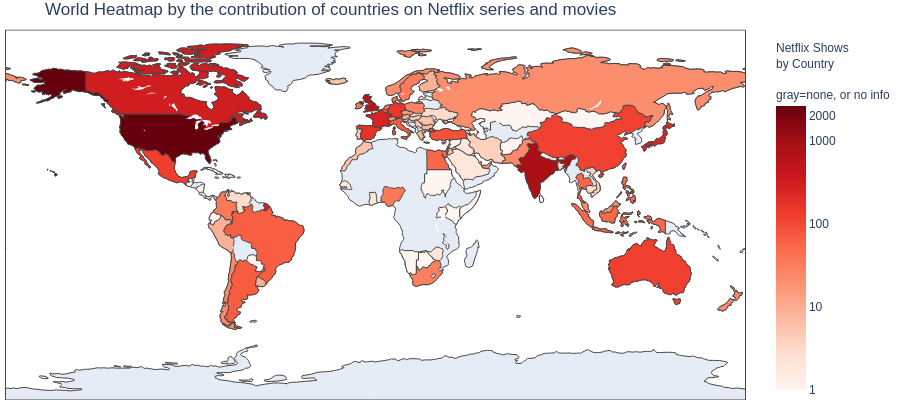

In [51]:
# GITHUB STATIC VERSION

# conda install -c plotly plotly-orca
from IPython.display import Image
import plotly.io as pio

# Setting the size of figure
layout = go.Layout(
    #autosize=True,
    width=900,
    height=700,
    title_text = "World Heatmap by the contribution of countries on Netflix series and movies"
)

# Hide config bar
config = {'displayModeBar': False}

fig = go.Figure(data=go.Choropleth(
    locations = merged_df['CODE'],
    # Setting up z axis to logarithmic scale 
    # (without it only US, UK and India are red, the others are the same - they three are like outliers)
    z=np.log2(merged_df['counts']),
    # What should be displayed
    text=(merged_df['heatmap_text']),
    # Turn off redundant info
    hoverinfo='text',
    # Setting up colorbar to logarithmic scale
    colorbar=dict(
                        #[0, 3.32192809489, 6.64385618977, 9.96578428466, 10.96578428466]
              tickvals = [np.log2(1), np.log2(10), np.log2(100), np.log2(1000), np.log2(2000)],
              ticktext = ['1', '10', '100', '1000', '2000']),
    colorscale = 'reds',
    colorbar_title='Netflix Shows <br>by Country <br> <br>gray=none, or no info'),
    layout=layout)

fig.update_layout(height=400, margin={"r":0,"t":30,"l":0,"b":0})

img_bytes = pio.to_image(fig, format="png")
Image(img_bytes)

### Q: What are the most common countries, that work together on programmes?

In [44]:
# Since the dataframe has 'country' cell like 'United States, United Kingdom' 
# AND 'United Kingdom, United States', 
# We can't just do a value_counts() method to find the most often cooperate countries, 
# we need to align them in some way.
list1 = []
for cell in df['country']:
    if isinstance(cell, str) and ',' in cell:
        cell = cell.split(', ')
        cell.sort()
        cellstr = ', '.join(cell)
        list1.append(cellstr)
    else:
        list1.append("none")

df['country_abc'] = list1

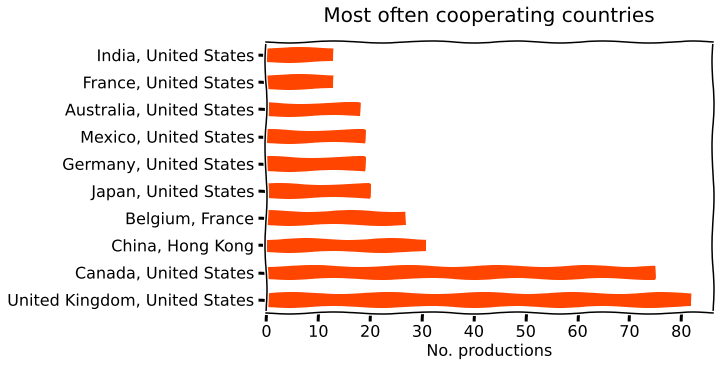

In [45]:
(df[df['country_abc'].str.contains(',', na=False)]['country_abc'].value_counts().head(10).plot.barh
(color="orangered", figsize=(8,5)))
plt.title('Most often cooperating countries', fontsize=20, y=1.05)
plt.xlabel('No. productions')
plt.show()

# Cast

### Q: Who are the actors/ actresses, who have played the most in Netflix movies or series?

In [46]:
# Performers list contains all the performers that participated in creation of any type of content on Netflix
# Every performer occures only once

def get_performers(filt="none"):
    """
    If no parameter given, returns with all the actors/ actresses names in a list.
    With parameter, returns with the wanted names only.
    """

    performers = []

    if str(filt) == "none": # srt(filter), so we can execute this comparison when filter parameter is given
    
        for i in df['cast']:
            if isinstance(i, str): # If it's not a NaN
                i = i.split(',') # Separate the names
                for k in i: # Go throgh the names
                        # Must contain ' ', because in the df.cast column contains a lot of names like 
                        # 'Jr', 'Jr.', 'Jay', which cannot be linked to a single person (sorry Cher)
                    if k.strip().lower().title() not in performers and len(k.strip()) > 1 and ' ' in k.strip():
                        # The performer may writes his/her name in other way, 
                        # but I want to avoid lowercase/uppercase mistakes
                        performers.append(k.strip().lower().title()) 
    
    else:
    
        for i in df[filt]['cast']:
            if isinstance(i, str):
                i = i.split(',')
                for k in i:
                    if k.strip().lower().title() not in performers and len(k.strip()) > 1 and ' ' in k.strip():
                        performers.append(k.strip().lower().title())
                        
    return performers

In [47]:
performers = get_performers()

performers_US_movie = get_performers((df['country'] == 'United States') & (df['type'] == 'Movie'))
performers_UK_movie = get_performers((df['country'] == 'United Kingdom') & (df['type'] == 'Movie'))
performers_India_movie = get_performers((df['country'] == 'India') & (df['type'] == 'Movie'))

performers_US_series = get_performers((df['country'] == 'United States') & (df['type'] == 'TV Show'))
performers_UK_series = get_performers((df['country'] == 'United Kingdom') & (df['type'] == 'TV Show'))
performers_India_series = get_performers((df['country'] == 'India') & (df['type'] == 'TV Show'))

In [48]:
print('Participated performers (who were listed at least in one cast cell): ', len(performers))

valid_cast_num = len(df['cast']) - df['cast'].isnull().sum()

# Non-null elements, where cast was provided
valid_cast_num = len(df['cast']) - df['cast'].isnull().sum()
print('Shows where cast were provided: ', valid_cast_num)
print('All shows number: ', len(df['cast']))

Participated performers (who were listed at least in one cast cell):  26892
Shows where cast were provided:  5664
All shows number:  6234


In [49]:
def to_dict(performers, filt="none"):
    
    # Same as earlier with the countries
    
    counts_performers = dict()
    
    if str(filt) == "none":
        for i in performers:
            for k in df['cast']:
                if isinstance(k, str):
                    if i in k:
                        counts_performers[i] = counts_performers.get(i, 0) + 1
                        
    else:
        for i in performers:
            for k in df[filt]['cast']:
                if isinstance(k, str):
                    if i in k:
                        counts_performers[i] = counts_performers.get(i, 0) + 1
                    
    return counts_performers

In [50]:
performers = to_dict(performers)

performers_US_movie = to_dict(performers_US_movie)
performers_UK_movie = to_dict(performers_UK_movie)
performers_India_movie = to_dict(performers_India_movie)

performers_US_series = to_dict(performers_US_series)
performers_UK_series = to_dict(performers_UK_series)
performers_India_series = to_dict(performers_India_series)

In [51]:
def to_df(dictionary):
    
    performers_df = pd.DataFrame(dictionary, index=[0])
    performers_df = performers_df.T
    
    performers_df.columns=['counts']
    
    performers_df.sort_values(by='counts', ascending=False, inplace=True)
    
    return performers_df

In [52]:
# Convert dict to df for visualize

performers_df = to_df(performers)

performers_US_movie_df = to_df(performers_US_movie)
performers_UK_movie_df = to_df(performers_UK_movie)
performers_India_movie_df = to_df(performers_India_movie)

performers_US_series_df = to_df(performers_US_series)
performers_UK_series_df = to_df(performers_UK_series)
performers_India_series_df = to_df(performers_India_series)

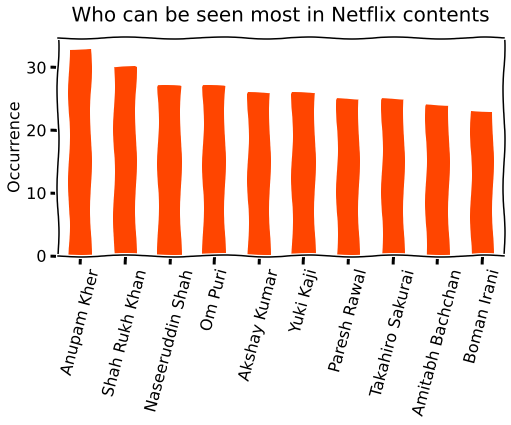

In [53]:
performers_df.head(10).plot.bar(rot=75, legend=None, color='orangered', figsize=(8,4))

plt.title('Who can be seen most in Netflix contents', fontsize=20, y=1.05)
plt.xlabel('')
plt.ylabel('Occurrence')

plt.show()

### Q: Who are the most popular actors/ actresses in the most productive countries?

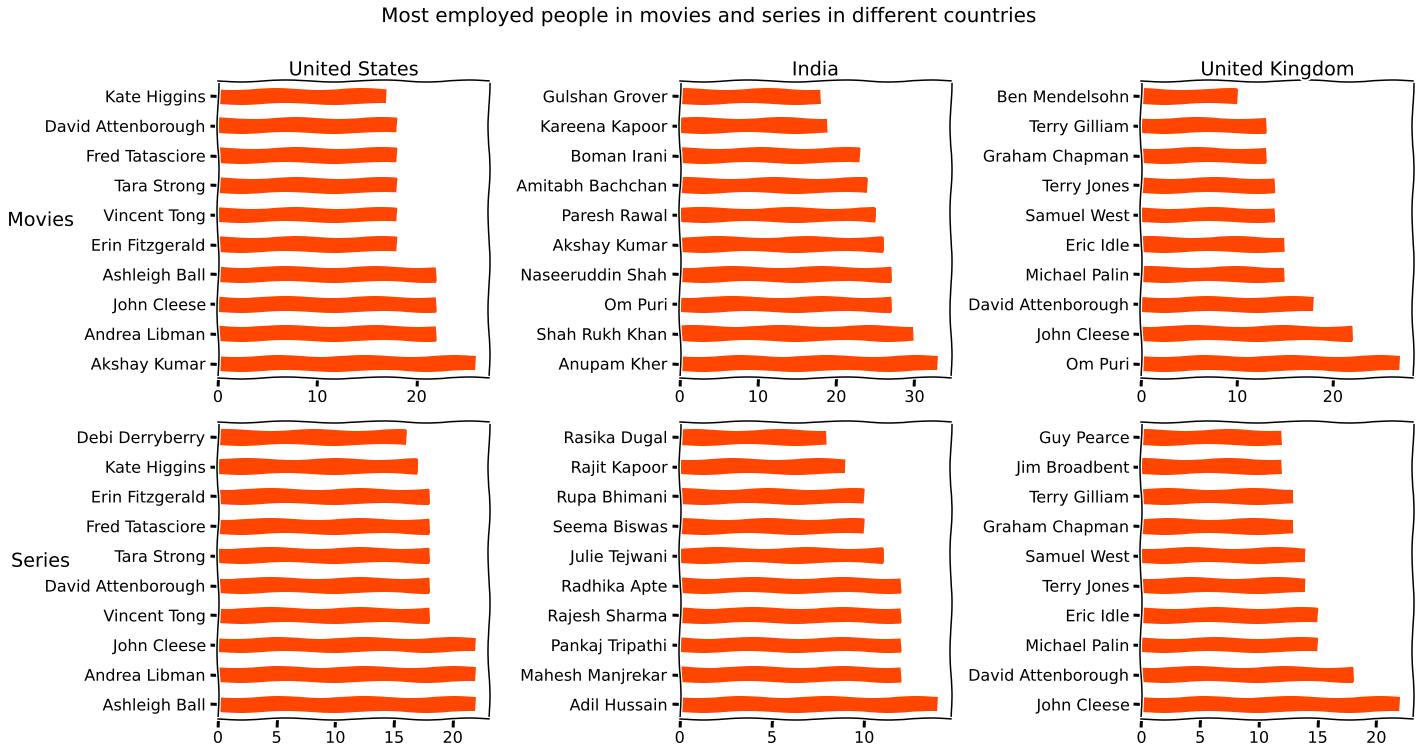

In [54]:
cols = ['United States', 'India', 'United Kingdom']
rows = ['Movies', 'Series']


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for ax, col in zip(axes[0], cols):
    ax.set_title(col)
    
for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')

performers_US_movie_df.head(10).plot.barh(ax=axes[0][0], legend=None, color='orangered')
performers_India_movie_df.head(10).plot.barh(ax=axes[0][1], legend=None, color='orangered')
performers_UK_movie_df.head(10).plot.barh(ax=axes[0][2], legend=None, color='orangered')

performers_US_series_df.head(10).plot.barh(ax=axes[1][0], legend=None, color='orangered')
performers_India_series_df.head(10).plot.barh(ax=axes[1][1], legend=None, color='orangered')
performers_UK_series_df.head(10).plot.barh(ax=axes[1][2], legend=None, color='orangered')
    
fig.suptitle('Most employed people in movies and series in different countries', fontsize=20, y=1.05)
    
fig.tight_layout()
plt.show()

**That does not mean, that we can just add up the numbers which are next to the same name - for example David Attenborough's numbers would add up to over 25, but he did 'only' 18 movies and series - that is because there are a lot of coproductions between nations.**

In [55]:
df[df['cast'].str.contains('David Attenborough', na=False)][['cast', 'type', 'title', 'country']]

,cast,type,title,country
show_id,,,,
70245168,David Attenborough,TV Show,Nature's Great Events (2009),"United States, United Kingdom"
70235731,David Attenborough,TV Show,The Blue Planet: A Natural History of the Oceans,United Kingdom
80097726,David Attenborough,TV Show,The Hunt,United Kingdom
80172468,David Attenborough,Movie,Nature: Raising the Dinosaur Giant,United States
80005588,David Attenborough,TV Show,Life Story,United Kingdom
70261978,David Attenborough,TV Show,Frozen Planet,"United Kingdom, United States, Spain, Germany,..."
70279637,David Attenborough,Movie,Frozen Planet: On Thin Ice,"United Kingdom, United States, Spain, Germany,..."
80049171,David Attenborough,Movie,Frozen Planet: The Epic Journey,"United Kingdom, United States, Spain, Germany,..."
80048250,David Attenborough,TV Show,The Making of Frozen Planet,"United Kingdom, United States, Spain, Germany,..."


### Q: Who are the actors/ actresses, who have played together in more movies or TV shows?

In [56]:
def make_pairs(list1):
    """
    Makes all possible pairs from given list.
    """
    
    pairs = [] # create empty list for the pairs
    for i in range(len(list1)): # go through the given list
        for k in range(i+1, len(list1)): # go through the given list from the selected element
            _ = [] # create emtpy list for a pair
            _.append(list1[i].strip()) # add first element
            _.append(list1[k].strip()) # add second element
            
            pairs.append(sorted(_)) # add the pair to the pairs list IN ABC ORDER
    return pairs # return with the list of pairs

In [57]:
# create an empty list for the lists of lists of pairs (lists of all creatable pairs from 'cast' cells)
big_pairs = [] 
for i in df['cast']: # go through the rows
    if isinstance(i, str): # skip NaN values
        if ',' in i: # do anything only, if there are more than one person in the cast
            i = i.split(',') # turn str to a list
            big_pairs.append(make_pairs(i)) # make a list with lists of pairs, and add to big_pairs

#print(len(big_pairs))

just_pairs = [] # create empty list for the pairs i need
for lista in big_pairs: # go through lists of pairs in big_list
    for pair in lista: # go through pairs in list
        if sorted(pair) not in just_pairs: 
            # sorted, because later it will contain only (a, b), and not (a, b) and (b, a) together
            just_pairs.append(sorted(pair)) # if just_pairs not contains the actual pair, add them to it
            
#print(len(just_pairs))

In [58]:
pairs = dict()

for k in df['cast']:    # & (df['type'] == 'Movie')
    if isinstance(k, str) and ',' in k: # if there is a cast, and not only one person
        for i in just_pairs:
            if i[0] in k and i[1] in k:
                pairs[tuple(i)] = pairs.get(tuple(i), 0) + 1

In [59]:
pairs_df = pd.DataFrame(pairs, index=[0])
pairs_df = pairs_df.T

pairs_df.columns=['counts']

pairs_df.sort_values(by='counts', ascending=False).head(10)

counts
John Paul Tremblay Robb Wells          15
Eric Idle          John Cleese         14
Michael Palin      Terry Jones         14
John Cleese        Terry Jones         14
                   Michael Palin       14
Eric Idle          Terry Jones         14
                   Michael Palin       14
Graham Chapman     John Cleese         13
Eric Idle          Graham Chapman      13
Michael Palin      Terry Gilliam       13

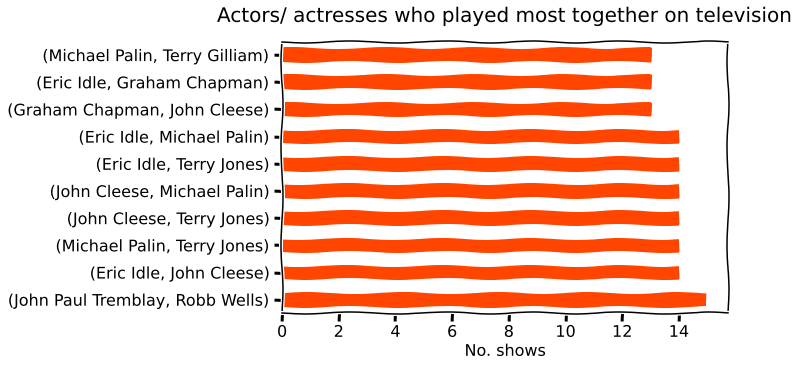

In [60]:
(pairs_df.sort_values(by='counts', ascending=False).head(10).plot.barh
 (legend=None, color='orangered', figsize=(8,5)))
plt.title('Actors/ actresses who played most together on television', fontsize=20, y=1.05)
plt.xlabel('No. shows')
plt.show()

In [61]:
df[(df['cast'].str.contains('John Paul Tremblay', na=False)) & 
   (df['cast'].str.contains('Robb Wells', na=False))][gen_cols].sort_values(by='release_year')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
81008272,Movie,One Last Shot,Mike Clattenburg,"Robb Wells, John Paul Tremblay, John Dunsworth",Canada,2018-08-24,1998,TV-MA,31 min,Comedies,"In this low-budget short film, two best buddie..."
70143440,Movie,Trailer Park Boys: Xmas Special,Mike Clattenburg,"John Paul Tremblay, Robb Wells, John Dunsworth...",Canada,2018-03-01,2004,TV-MA,46 min,Movies,See what Sunnyvale Trailer Park was like back ...
70069233,Movie,Trailer Park Boys: The Movie,Mike Clattenburg,"Robb Wells, John Paul Tremblay, Mike Smith, Lu...",Canada,2018-03-30,2006,R,95 min,"Comedies, Cult Movies","In this feature-length adventure, Ricky, Julia..."
70304189,Movie,Trailer Park Boys: Say Goodnight to the Bad Guys,Mike Clattenburg,"John Paul Tremblay, Robb Wells, John Dunsworth...",Canada,2018-03-01,2008,TV-MA,47 min,"Comedies, Cult Movies","A year after the Season 7 finale, the boys are..."
70128549,Movie,Trailer Park Boys: Countdown to Liquor Day,Mike Clattenburg,"Robb Wells, John Paul Tremblay, Mike Smith, Jo...",Canada,2018-03-30,2009,R,102 min,"Comedies, Cult Movies","After their latest jail stint, boozy pals Juli..."
81008283,TV Show,The Drunk and on Drugs Happy Funtime Hour,NaN,"John Paul Tremblay, Robb Wells, Maury Chaykin,...",Canada,2018-08-24,2011,TV-MA,1 Season,"International TV Shows, TV Comedies",A variety-show production trips up big time wh...
70304191,Movie,Swearnet: The Movie,Warren P. Sonoda,"Mike Smith, John Paul Tremblay, Robb Wells, Pa...",Canada,2017-09-24,2014,NR,112 min,"Comedies, International Movies","After losing a TV network deal, the Trailer Pa..."
70304187,Movie,Swearnet Live,"Mike Smith, John Paul Tremblay, Robb Wells","Mike Smith, John Paul Tremblay, Robb Wells, Jo...",Canada,2018-03-01,2014,TV-MA,75 min,"Comedies, International Movies","""Trailer Park Boys"" John Paul Tremblay, Robb W..."
70304188,Movie,Trailer Park Boys Live at the North Pole,"Mike Smith, John Paul Tremblay, Robb Wells","Mike Smith, John Paul Tremblay, Robb Wells, Jo...",Canada,2018-03-01,2014,NR,89 min,Movies,Bubbles's plan to spread the true meaning of C...


**The John Paul Tremblay - Robb Wells is the most aired actor duo on Netflix.**

### Q: What actor/ actress duo has played most together in US comedy movies?

In [62]:
us_comedy_pairs = dict()

for k in (df[(df['country']=='United States') & (df['type'] == 'Movie') & 
             (df['listed_in'].str.contains('Comedies', na=False))]['cast']):
    if isinstance(k, str) and ',' in k: # if there is a cast, and not only one person
        for i in just_pairs:
            if i[0] in k and i[1] in k:
                us_comedy_pairs[tuple(i)] = us_comedy_pairs.get(tuple(i), 0) + 1

In [63]:
us_comedy_pairs_df = pd.DataFrame(us_comedy_pairs, index=[0])
us_comedy_pairs_df = us_comedy_pairs_df.T

us_comedy_pairs_df.columns=['counts']

us_comedy_pairs_df.sort_values(by='counts', ascending=False).head(10)

,,counts
Adam Sandler,Nick Swardson,5
Alexa PenaVega,Daryl Sabara,4
Nick Swardson,Rob Schneider,3
Alexa PenaVega,Danny Trejo,3
Adam Sandler,Jonathan Loughran,3
Mike Myers,Seth Green,3
Michael York,Mike Myers,3
Mike Myers,Mindy Sterling,3
Adam Sandler,David Spade,3
Michael York,Seth Green,3


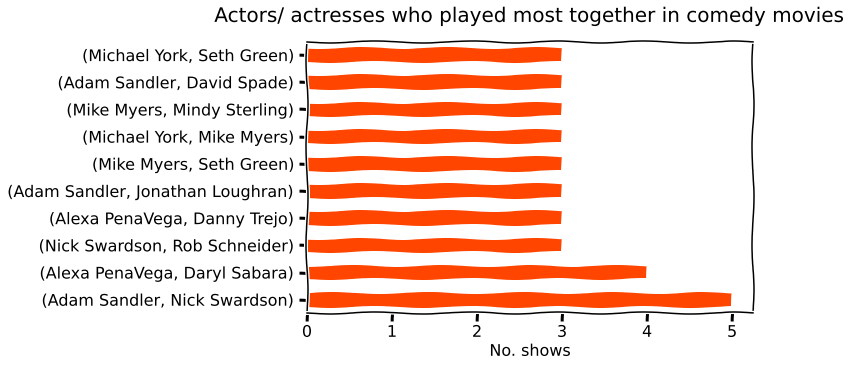

In [64]:
(us_comedy_pairs_df.sort_values(by='counts', ascending=False).head(10).plot.barh
 (legend=None, color='orangered', figsize=(8,5)))
plt.title('Actors/ actresses who played most together in comedy movies', fontsize=20, y=1.05)
plt.xlabel('No. shows')

plt.show()

**In Netflix movies made in the United States with the label 'Comedies', Adam Sandler and Nick Swardson appeares on the screen most often together.**

### Q: Who are the most productive movie and series directors on Netflix?

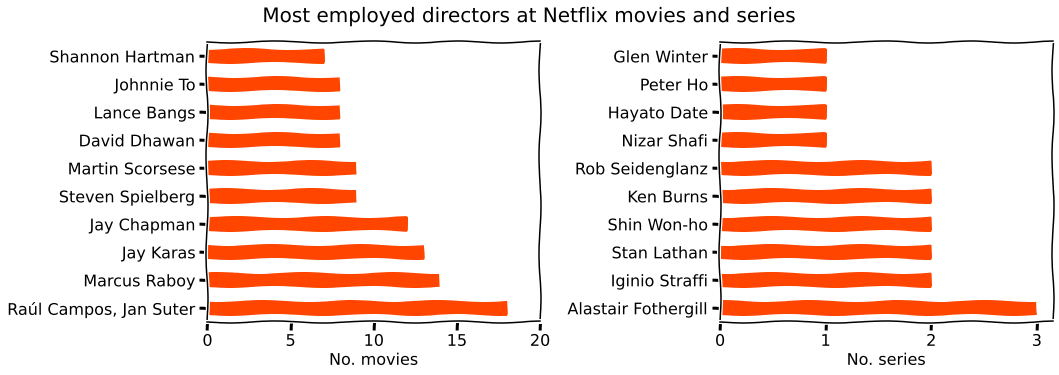

In [65]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

mov = df['type']=='Movie'
show = df['type']=='TV Show'

ax1 = df[mov]['director'].sort_values().value_counts().head(10).plot.barh(ax=ax1, color='orangered')

ax2 = df[show]['director'].sort_values().value_counts().head(10).plot.barh(ax=ax2, color='orangered')

ax1.set_xticks([0,5,10,15,20])
ax1.set_xlabel('No. movies')

ax2.set_xticks([0,1,2,3])
ax2.set_xlabel('No. series')


fig.suptitle('Most employed directors at Netflix movies and series', fontsize=20, y=1.05)
    
fig.tight_layout()

fig.show()

# References

https://www.kaggle.com/shivamb/netflix-shows

https://pandas.pydata.org/pandas-docs/stable/reference/

https://plotly.com/python/choropleth-maps/

https://matplotlib.org/3.2.1/api/pyplot_summary.html

https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas

This notebook was created on a dataset what contains data from Netflix up to the end of 2019.

I worked with the data provided, did not make any substantive changes on the dataset; when there was lack of data, I skipped those rows only at relevant examinations.

**I also would like to thank the whole Jovian.ml and freeCodeCamp teams for this great free online course.**

This notebook was made as a project for the Zero to Pandas Data Analysis course (2020) final.

Created by Attila Balogh

In [ ]:
project_name = "githubra_proba"
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Uploading notebook to https://jovian.ml/attila-balogh/githubra_proba


<IPython.core.display.Javascript object>